In [73]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

%matplotlib inline

In [2]:
#Reading the csv file and converting it to a dataframe with pandas for analysis with name data
data = pd.read_csv('shootings.csv') 

# 1. Understanding The Data
##    This is made up of the various codes to bring out the general overview and meaning of the dataset 

In [3]:
#Getting an overview of what the data contains
#Including the various columns that make up the dataset
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [4]:
#Checking the first 5 rows of the dataset to get the head of the dataset
#This is to check to see if the loading was done appropriately and none of the first five rows contain weird values
#The .head() method helps to get this in place
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
#Checking the last 5 rows of the dataset to get the head of the dataset
#This is to check to see if the loading was done appropriately and none of the last five rows contain weird values
#The .tail() method helps to get this in place
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [6]:
#This is to get the total number of rows and columns in the dataset
#This gives an overview of what the whole data entails
#It returns a tuple with the first entry for the rows and the second the total number of columns including the part for the ids given by Jupyter
data.shape

(4895, 15)

In [100]:
#This gives an overview of where the data starts and where it ends
data.index

RangeIndex(start=0, stop=4895, step=1)

In [7]:
#Also, it will be important to get the scope of numerical values in the dataset
#These will include the minimum, maximum, count, standard deviations and the various percentile values
data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [8]:
#Data is well explored when we know all that the values columns hold
#Their data types, and whether some have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4895 non-null object
armed                      4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
city                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


In [9]:
#For exploring data, it will be great to know the various names of all the columns as a list
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [29]:
#To check whether any of the columns have a null value
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

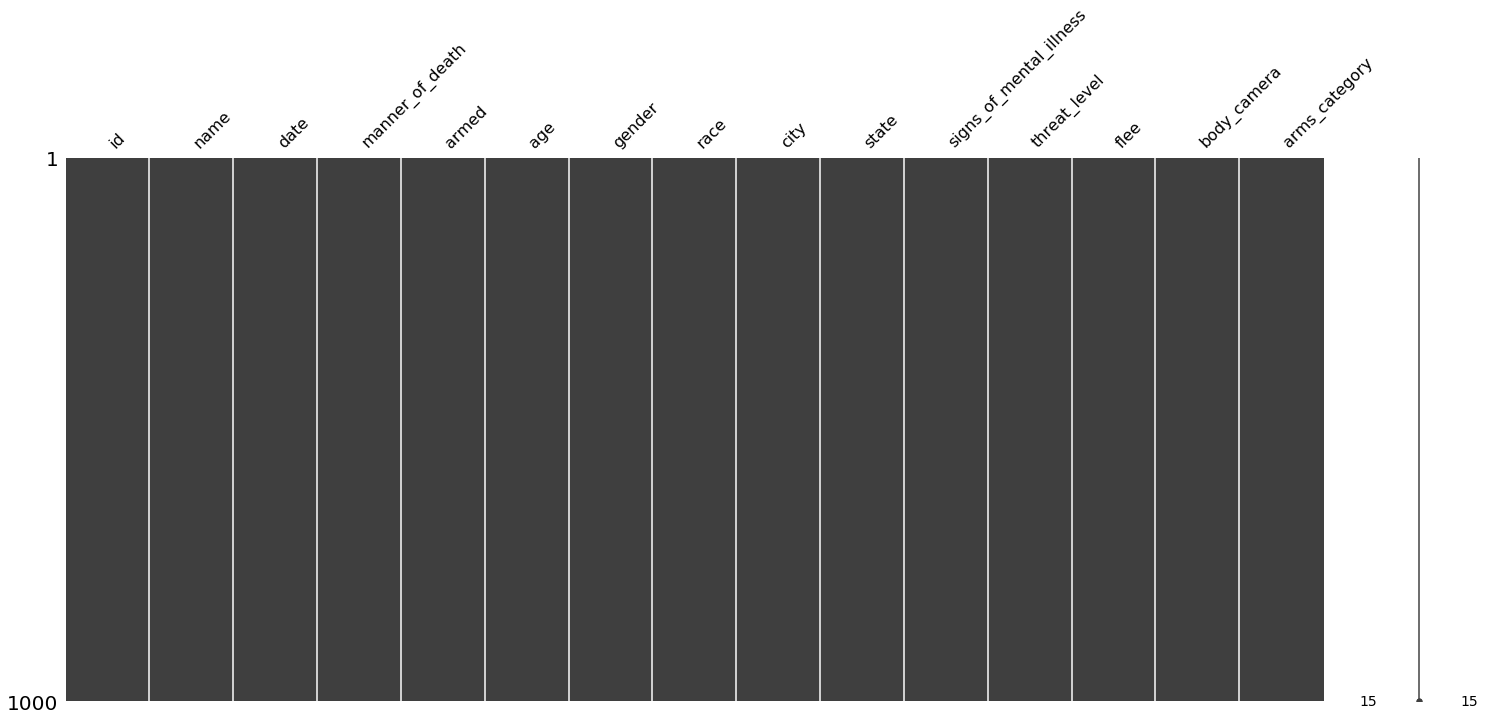

In [59]:
#The missingno module can be used to graphically show the nullity of the data using the matrix command
msno.matrix(data.sample(1000));

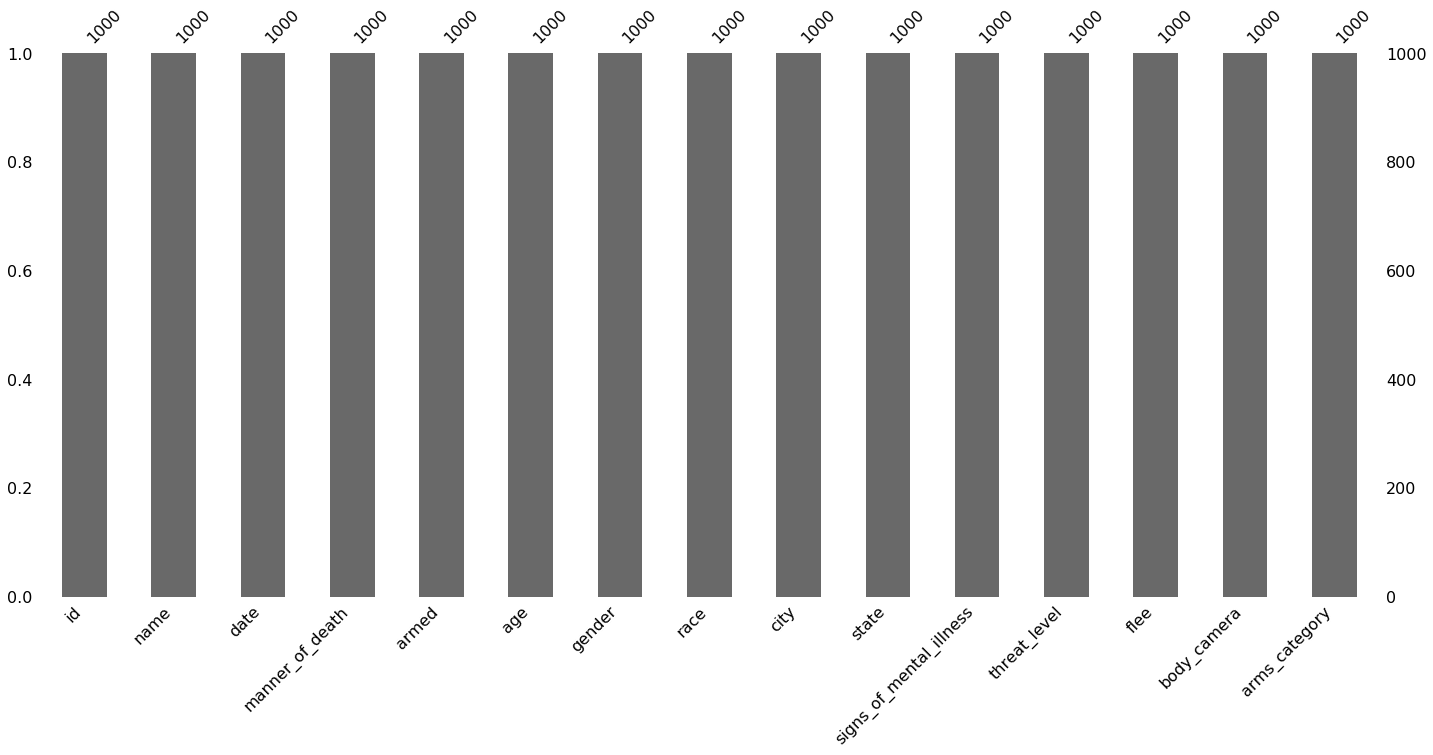

In [60]:
#The missingno module can be used to graphically show the nullity of the data using the bar command
msno.bar(data.sample(1000));

In [38]:
#To get an array of the various unique names in the data
data['name'].unique()

array(['Tim Elliot', 'Lewis Lee Lembke', 'John Paul Quintero', ...,
       'Hannah Fizer', 'William Slyter', 'Nicholas Hirsh'], dtype=object)

In [12]:
#To get the total number of all the values that make up the name column
data.name.value_counts(ascending=True, dropna = False)

William Tracy Patterson     1
Mario Dantoni Bass          1
Nicholas Berger             1
James Bushey                1
Stephon Clark               1
                           ..
Jeffrey Sims                2
Clayton Andrews             2
Michael Ferguson            2
David Tylek Atkinson        2
TK TK                      29
Name: name, Length: 4851, dtype: int64

In [41]:
#To get an array of the various unique dates in the data
data['date'].unique()

array(['2015-01-02', '2015-01-03', '2015-01-04', ..., '2020-06-12',
       '2020-06-13', '2020-06-15'], dtype=object)

In [13]:
#To get the total count of each value that makes up the date column
data.date.value_counts(ascending=True, dropna = False)

2016-05-03    1
2018-08-17    1
2017-07-02    1
2019-12-09    1
2020-01-19    1
             ..
2018-04-05    8
2018-03-12    8
2018-01-06    9
2018-06-29    9
2018-04-01    9
Name: date, Length: 1792, dtype: int64

In [42]:
#To get an array of the various unique manner_of_death in the data
data['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [14]:
#To get the total count of each value that makes up the manner_of_death column
data.manner_of_death.value_counts(ascending=True, dropna=False)

shot and Tasered     248
shot                4647
Name: manner_of_death, dtype: int64

In [43]:
#To get an array of the various unique armed values in the data
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [16]:
#To get the total count of each value that makes up the armed column
data.armed.value_counts(ascending=True, dropna=False)

barstool                     1
air conditioner              1
spear                        1
bean-bag gun                 1
baseball bat and knife       1
                          ... 
toy weapon                 171
unarmed                    348
unknown                    418
knife                      708
gun                       2755
Name: armed, Length: 89, dtype: int64

In [44]:
#To get an array of the various unique age values in the data
data['age'].unique()

array([53.       , 47.       , 23.       , 32.       , 39.       ,
       18.       , 22.       , 35.       , 34.       , 25.       ,
       31.       , 41.       , 30.       , 37.       , 28.       ,
       42.       , 36.       , 49.       , 71.       , 33.       ,
       29.       , 43.       , 24.       , 75.       , 68.       ,
       27.       , 48.       , 21.       , 67.       , 19.       ,
       54.       , 17.       , 56.       , 61.       , 45.       ,
       26.       , 40.       , 59.       , 38.       , 51.       ,
       74.       , 57.       , 46.       , 16.       , 50.       ,
       20.       , 77.       , 37.1179309, 58.       , 64.       ,
       52.       , 63.       , 44.       , 60.       , 66.       ,
       83.       , 72.       , 76.       , 62.       , 55.       ,
       69.       , 15.       , 65.       ,  6.       , 12.       ,
       70.       , 80.       , 14.       , 82.       , 13.       ,
       73.       , 91.       , 79.       , 78.       , 84.    

In [17]:
#To get the total count of each value that makes up the age column
data.age.value_counts(ascending=True, dropna=False)

91.0      1
78.0      1
81.0      1
79.0      1
12.0      1
       ... 
29.0    160
33.0    164
27.0    165
31.0    174
25.0    176
Name: age, Length: 76, dtype: int64

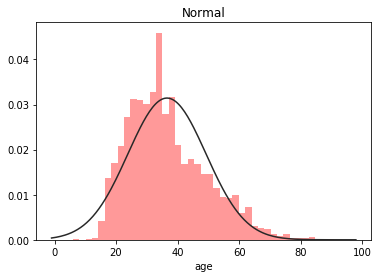

In [95]:
#Since the age column is made up of values it will be idea to check the kind of distribution
#So here we plot the age column with respect to a normal distribution curve to see its behaviour
y = data['age']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm, color='red');

In [45]:
#To get an array of the various unique gender values in the data
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
#To get the total count of each value that makes up the gender column
data.gender.value_counts(ascending=True, dropna=False)

F     222
M    4673
Name: gender, dtype: int64

In [46]:
#To get an array of the various unique race values in the data
data['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [19]:
#To get the total count of each value that makes up the race column
data.race.value_counts(ascending=True, dropna=False)

Other         48
Native        78
Asian         93
Hispanic     902
Black       1298
White       2476
Name: race, dtype: int64

In [47]:
#To get an array of the various unique city values in the data
data['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Industry', 'Paso Robles',
       'Crown Point'], dtype=object)

In [24]:
#To get the total count of each value that makes up the city column
data.city.value_counts(ascending=True, dropna=False)

Lincoln CIty      1
East Hartford     1
Elkridge          1
Bull Shoals       1
Juneau            1
                 ..
San Antonio      40
Las Vegas        41
Houston          51
Phoenix          66
Los Angeles      78
Name: city, Length: 2288, dtype: int64

In [48]:
#To get an array of the various unique state values in the data
data['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [27]:
#To get the total count of each value that makes up the state column
data.state.value_counts(ascending=True, dropna=False)

RI      4
VT      8
DE     10
ND     11
NH     12
WY     13
DC     13
SD     14
CT     20
ME     21
NE     24
MT     29
HI     29
IA     31
MA     33
AK     36
ID     37
WV     46
KS     49
UT     58
MN     60
NJ     60
MS     61
MI     71
AR     73
OR     76
MD     77
SC     80
NV     85
KY     87
WI     88
NY     90
IN     91
VA     92
NM     93
PA     95
AL     95
IL     99
LA    102
MO    124
TN    125
WA    126
OH    146
NC    148
OK    151
GA    161
CO    168
AZ    222
FL    324
TX    426
CA    701
Name: state, dtype: int64

In [49]:
#To get an array of the various unique signs_of_mental_illness values in the data
data['signs_of_mental_illness'].unique()

array([ True, False])

In [30]:
#To get the total count of each value that makes up the signs_of_mental_illness column
data.signs_of_mental_illness.value_counts(ascending=True, dropna=False)

True     1103
False    3792
Name: signs_of_mental_illness, dtype: int64

In [50]:
#To get an array of the various unique threat_level values in the data
data['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [31]:
#To get the total count of each value that makes up the threat_level column
data.threat_level.value_counts(ascending=True, dropna=False)

undetermined     207
other           1528
attack          3160
Name: threat_level, dtype: int64

In [51]:
#To get an array of the various unique flee values in the data
data['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [32]:
#To get the total count of each value that makes up the flee column
data.flee.value_counts(ascending=True, dropna=False)

Other           360
Foot            642
Car             820
Not fleeing    3073
Name: flee, dtype: int64

In [52]:
#To get an array of the various unique body_camera values in the data
data['body_camera'].unique()

array([False,  True])

In [33]:
#To get the total count of each value that makes up the body_camera column
data.body_camera.value_counts(ascending=True, dropna=False)

True      578
False    4317
Name: body_camera, dtype: int64

In [53]:
#To get an array of the various unique arms_category values in the data
data['arms_category'].unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

In [34]:
#To get the total count of each value that makes up the arms_category column
data.arms_category.value_counts(ascending=True, dropna=False)

Hand tools                  1
Explosives                  4
Electrical devices         24
Piercing objects           29
Multiple                   54
Vehicles                  121
Blunt instruments         122
Other unusual objects     192
Unarmed                   348
Unknown                   418
Sharp objects             818
Guns                     2764
Name: arms_category, dtype: int64

In [65]:
#Code to see the various deaths grouped by the dates
for group_key, group_value in data.groupby('date'):
    print(group_key)
    print(group_value)

2015-01-02
   id              name        date manner_of_death armed   age gender   race  \
0   3        Tim Elliot  2015-01-02            shot   gun  53.0      M  Asian   
1   4  Lewis Lee Lembke  2015-01-02            shot   gun  47.0      M  White   

      city state  signs_of_mental_illness threat_level         flee  \
0  Shelton    WA                     True       attack  Not fleeing   
1    Aloha    OR                    False       attack  Not fleeing   

   body_camera arms_category  
0        False          Guns  
1        False          Guns  
2015-01-03
   id                name        date   manner_of_death    armed   age gender  \
2   5  John Paul Quintero  2015-01-03  shot and Tasered  unarmed  23.0      M   

       race     city state  signs_of_mental_illness threat_level         flee  \
2  Hispanic  Wichita    KS                    False        other  Not fleeing   

   body_camera arms_category  
2        False       Unarmed  
2015-01-04
   id               name    

     id              name        date manner_of_death armed   age gender  \
97  136  Kenneth Kreyssig  2015-02-09            shot   gun  61.0      M   
98  137    Desmond Luster  2015-02-09            shot   gun  45.0      M   

     race    city state  signs_of_mental_illness  threat_level         flee  \
97  White  Smyrna    ME                     True  undetermined  Not fleeing   
98  Black  Dallas    TX                    False        attack  Not fleeing   

    body_camera arms_category  
97        False          Guns  
98        False          Guns  
2015-02-10
      id                     name        date   manner_of_death    armed  \
99   139             Anthony Bess  2015-02-10              shot      gun   
100  140             Brian Fritze  2015-02-10              shot      gun   
101  138  Antonio Zambrano-Montes  2015-02-10  shot and Tasered  unarmed   

      age gender      race        city state  signs_of_mental_illness  \
99   49.0      M     Black  Whitehaven    TN    

2015-03-20
      id           name        date manner_of_death    armed   age gender  \
210  308  Richard White  2015-03-20            shot  machete  63.0      M   
211  310     Tyrel Vick  2015-03-20            shot      gun  34.0      M   
212  531  Justin Fowler  2015-03-20            shot      gun  24.0      M   

       race         city state  signs_of_mental_illness threat_level  \
210   Black  New Orleans    LA                     True       attack   
211   White  Coal County    OK                    False       attack   
212  Native   Red Valley    AZ                    False       attack   

            flee  body_camera  arms_category  
210  Not fleeing        False  Sharp objects  
211  Not fleeing        False           Guns  
212          Car        False           Guns  
2015-03-21
      id         name        date manner_of_death armed   age gender   race  \
213  235  Enoch Gaver  2015-03-21            shot   gun  21.0      M  White   
214  309  James Ellis  2015-03-21 

295  Not fleeing        False        Unknown  
2015-04-22
      id                     name        date manner_of_death    armed   age  \
296  391          William Chapman  2015-04-22            shot  unarmed  18.0   
297  394  Carlos Saavedra Ramirez  2015-04-22            shot    knife  51.0   
298  395          Jonathan Efraim  2015-04-22            shot      gun  30.0   
299  396        Reginald McGregor  2015-04-22            shot      gun  31.0   
300  397                 Lue Vang  2015-04-22            shot      gun  39.0   

    gender      race              city state  signs_of_mental_illness  \
296      M     Black        Portsmouth    VA                    False   
297      M  Hispanic            Bisbee    AZ                    False   
298      M     White            Queens    NY                     True   
299      M     Black        Fort Worth    TX                    False   
300      M     Asian  Eldorado Springs    CO                    False   

     threat_level     

      id           name        date manner_of_death  armed   age gender  \
396  507  Usaamah Rahim  2015-06-02            shot  knife  26.0      M   
397  508   Kamal Dajani  2015-06-02            shot  knife  26.0      M   

      race        city state  signs_of_mental_illness threat_level  \
396  Black  Roslindale    MA                    False        other   
397  White        Azle    TX                     True       attack   

            flee  body_camera  arms_category  
396  Not fleeing        False  Sharp objects  
397  Not fleeing        False  Sharp objects  
2015-06-03
      id                name        date   manner_of_death    armed   age  \
398  509     Miguel Martinez  2015-06-03              shot      gun  18.0   
399  510  Edelmiro Hernandez  2015-06-03              shot    knife  33.0   
400  511         Ronald Neal  2015-06-03              shot      gun  56.0   
401  512       Lorenzo Garza  2015-06-03              shot      gun  46.0   
402  513           Rudy Ba

2015-07-15
      id            name        date   manner_of_death       armed   age  \
510  643  Eugene Kailing  2015-07-15  shot and Tasered  metal pipe  43.0   

    gender   race    city state  signs_of_mental_illness threat_level  \
510      M  White  Marion    MI                     True        other   

            flee  body_camera      arms_category  
510  Not fleeing        False  Blunt instruments  
2015-07-16
      id                         name        date   manner_of_death  \
511  646             Antonio Gonzalez  2015-07-16              shot   
512  647            Edward Foster III  2015-07-16              shot   
513  648       Patrick Stephen Pippin  2015-07-16              shot   
514  649  Mohammad Youssef Abdulazeez  2015-07-16              shot   
515  656                   Saige Hack  2015-07-16              shot   
516  664      Pierre Gabriel Koellner  2015-07-16              shot   
517  642               Anthonie Smith  2015-07-16  shot and Tasered   

       

634  Not fleeing        False                   Guns  
2015-08-27
      id            name        date   manner_of_death               armed  \
635  782  Yonas Alehegne  2015-08-27              shot               chain   
636  783    Robert Hober  2015-08-27              shot          box cutter   
637  784  Manuel Soriano  2015-08-27              shot  contractor's level   
638  781  Bertrand Davis  2015-08-27  shot and Tasered          box cutter   

      age gender      race         city state  signs_of_mental_illness  \
635  30.0      M     Black      Oakland    CA                    False   
636  54.0      M     White    San Diego    CA                    False   
637  29.0      M  Hispanic  Los Angeles    CA                    False   
638  42.0      M     Black       Dallas    TX                    False   

    threat_level         flee  body_camera          arms_category  
635       attack  Not fleeing         True  Other unusual objects  
636        other  Not fleeing       

728        False          Guns  
2015-10-02
      id                  name        date   manner_of_death    armed   age  \
729  888         David M. Diaz  2015-10-02              shot      gun  28.0   
730  890  Phyllis Ilene Jepsen  2015-10-02              shot    knife  55.0   
731  892       Matthew Dobbins  2015-10-02              shot  unarmed  29.0   
732  889        Christian Pena  2015-10-02  shot and Tasered    knife  26.0   

    gender      race          city state  signs_of_mental_illness  \
729      M  Hispanic  Sierra Vista    AZ                    False   
730      F     White         Aloha    OR                     True   
731      M     White      Amarillo    TX                    False   
732      M  Hispanic        Rialto    CA                    False   

     threat_level         flee  body_camera  arms_category  
729        attack          Car        False           Guns  
730         other  Not fleeing        False  Sharp objects  
731  undetermined  Not fleeing 

839        attack         Foot        False                   Guns  
2015-11-14
       id           name        date manner_of_death   armed   age gender  \
840  1006  Ramon Salazar  2015-11-14            shot  hammer  31.0      M   

         race           city state  signs_of_mental_illness threat_level  \
840  Hispanic  Jurupa Valley    CA                    False        other   

            flee  body_camera      arms_category  
840  Not fleeing        False  Blunt instruments  
2015-11-15
       id                   name        date   manner_of_death       armed  \
841  1003        Richard Perkins  2015-11-15              shot  toy weapon   
842  1009        Shane Whitehead  2015-11-15              shot     unknown   
843  1012            Jamar Clark  2015-11-15              shot     unarmed   
844  1004  John David Livingston  2015-11-15  shot and Tasered       Taser   

      age gender   race         city state  signs_of_mental_illness  \
841  39.0      M  Black      Oakland 

       id                name        date manner_of_death    armed   age  \
934  1103     Trayvon Scruggs  2015-12-19            shot      gun  24.0   
935  1105  Ruben Jose Herrera  2015-12-19            shot  unknown  26.0   

    gender      race         city state  signs_of_mental_illness threat_level  \
934      M     Black      Concord    VA                    False       attack   
935      M  Hispanic  Los Angeles    CA                     True       attack   

            flee  body_camera arms_category  
934        Other        False          Guns  
935  Not fleeing        False       Unknown  
2015-12-20
       id            name        date manner_of_death armed   age gender  \
936  1106  Leroy Browning  2015-12-20            shot   gun  30.0      M   
937  1107   Mark  Ramirez  2015-12-20            shot   gun  31.0      M   

         race      city state  signs_of_mental_illness threat_level  \
936     Black  Palmdale    CA                    False       attack   
937  Hi

1036       attack          Car        False       Unknown  
2016-01-30
        id                name        date manner_of_death     armed   age  \
1037  1221    Charles M. Smith  2016-01-30            shot       gun  29.0   
1038  1222   Philip B. Salazar  2016-01-30            shot  scissors  38.0   
1039  1224         Jose Alegre  2016-01-30            shot       gun  64.0   
1040  1230  Jeremy J. Sinclair  2016-01-30            shot       gun  42.0   

     gender      race          city state  signs_of_mental_illness  \
1037      M     Black       Chicago    IL                    False   
1038      M  Hispanic  Fort Collins    CO                    False   
1039      M  Hispanic     Rossville    GA                     True   
1040      M     White   Sugar Creek    MO                    False   

     threat_level         flee  body_camera  arms_category  
1037       attack  Not fleeing        False           Guns  
1038        other  Not fleeing        False  Sharp objects  
1039

1166         other  Not fleeing        False               Guns  
2016-03-14
        id          name        date manner_of_death armed   age gender  \
1167  1364  Lamar Harris  2016-03-14            shot   gun  29.0      M   

       race     city state  signs_of_mental_illness threat_level  flee  \
1167  Black  Chicago    IL                    False       attack  Foot   

      body_camera arms_category  
1167        False          Guns  
2016-03-15
        id               name        date manner_of_death  armed   age gender  \
1168  1366      Joseph Harris  2016-03-15            shot    gun  34.0      M   
1169  1369  Daniel J. Wooters  2016-03-15            shot  knife  38.0      M   
1170  1371  Ed Russell McIver  2016-03-15            shot    gun  43.0      M   

       race          city state  signs_of_mental_illness threat_level   flee  \
1168  White  Russellville    KY                    False        other   Foot   
1169  White    Evansville    IN                    False   

        id                 name        date manner_of_death    armed   age  \
1266  1480  Francis Scot Dufore  2016-04-20            shot      gun  41.0   
1267  1481   Jackie Lee Kirkham  2016-04-20            shot  unknown  52.0   

     gender   race        city state  signs_of_mental_illness threat_level  \
1266      M  White   Homestead    FL                    False       attack   
1267      M  White  Perryville    AR                    False        other   

             flee  body_camera arms_category  
1266  Not fleeing        False          Guns  
1267  Not fleeing        False       Unknown  
2016-04-21
        id                  name        date manner_of_death  armed   age  \
1268  1482  Mario Mejia Martinez  2016-04-21            shot  knife  48.0   

     gender      race     city state  signs_of_mental_illness threat_level  \
1268      M  Hispanic  Everett    MA                    False        other   

             flee  body_camera  arms_category  
1268  Not fleeing 

        id                      name        date manner_of_death  armed   age  \
1343  1561  Bodhi Wilson Dean Phelps  2016-05-24            shot  knife  22.0   
1344  1567             Mario Montoya  2016-05-24            shot    gun  31.0   

     gender      race         city state  signs_of_mental_illness  \
1343      M     White      Gresham    OR                    False   
1344      M  Hispanic  Albuquerque    NM                    False   

     threat_level         flee  body_camera  arms_category  
1343        other  Not fleeing        False  Sharp objects  
1344       attack  Not fleeing        False           Guns  
2016-05-25
        id               name        date manner_of_death    armed   age  \
1345  1565      Derek Prophet  2016-05-25            shot    knife  43.0   
1346  1566  Doll Pierre-Louis  2016-05-25            shot  unknown  24.0   

     gender   race           city state  signs_of_mental_illness threat_level  \
1345      M  White  Oklahoma City    OK     

1439          Car        False  Other unusual objects  
2016-06-28
        id         name        date manner_of_death  armed   age gender  \
1440  1670   Barry Prak  2016-06-28            shot  knife  27.0      M   
1441  1671  Walden Dang  2016-06-28            shot  knife  61.0      M   

       race        city state  signs_of_mental_illness threat_level  \
1440  Asian  Long Beach    CA                    False        other   
1441  Asian    Honolulu    HI                    False       attack   

             flee  body_camera  arms_category  
1440         Foot        False  Sharp objects  
1441  Not fleeing        False  Sharp objects  
2016-06-29
        id                        name        date manner_of_death      armed  \
1442  1672             Jessie J. Mills  2016-06-29            shot    unknown   
1443  1673                Tyrone Reado  2016-06-29            shot        gun   
1444  1674             Lafayette Evans  2016-06-29            shot        gun   
1445  1675  Mi

1536  Not fleeing        False  Sharp objects  
2016-08-08
        id                  name        date manner_of_death  armed   age  \
1537  1766        Darnell Wicker  2016-08-08            shot  knife  57.0   
1538  1771       Michael McClurg  2016-08-08            shot    gun  56.0   
1539  1773  James Eugene Burgess  2016-08-08            shot    gun  64.0   
1540  1774       Juan J. Godines  2016-08-08            shot    gun  34.0   
1541  1833     James W. Jennings  2016-08-08            shot    gun  69.0   

     gender      race             city state  signs_of_mental_illness  \
1537      M     Black       Louisville    KY                    False   
1538      M     White   Citrus Heights    CA                    False   
1539      M     White       Wilkesboro    NC                    False   
1540      M  Hispanic       Georgetown    KY                    False   
1541      M     White  Little Mountain    SC                     True   

     threat_level         flee  body_ca

1639  Not fleeing        False          Sharp objects  
2016-09-18
        id          name        date manner_of_death armed   age gender  \
1640  1891  Philip Hasan  2016-09-18            shot   gun  61.0      M   

       race   city state  signs_of_mental_illness threat_level         flee  \
1640  Black  Akron    OH                    False        other  Not fleeing   

      body_camera arms_category  
1640        False          Guns  
2016-09-19
        id                name        date manner_of_death    armed   age  \
1641  1900     Michelle Miller  2016-09-19            shot      gun  46.0   
1642  1902  Jeremy Ray Swenson  2016-09-19            shot  unknown  30.0   
1643  1907      Gary Don Lafon  2016-09-19            shot      gun  56.0   

     gender   race          city state  signs_of_mental_illness threat_level  \
1641      F  White        Spring    TX                     True       attack   
1642      M  White  Logan Canyon    UT                     True        othe

        id                  name        date manner_of_death    armed   age  \
1718  1986  Nathaniel B. Dorough  2016-10-22            shot  unknown  21.0   

     gender   race      city state  signs_of_mental_illness threat_level  \
1718      M  White  Westover    AL                     True        other   

             flee  body_camera arms_category  
1718  Not fleeing        False       Unknown  
2016-10-23
        id                         name        date manner_of_death  \
1719  1984  Kristofer Daniel Youngquist  2016-10-23            shot   
1720  1985                Kenny Tomblin  2016-10-23            shot   
1721  1987          Demetrius Mac Moore  2016-10-23            shot   

           armed   age gender   race              city state  \
1719  toy weapon  45.0      M  White          Peterson    MN   
1720         gun  38.0      M  White          Edmonton    KY   
1721         gun  40.0      M  Black  Colorado Springs    CO   

      signs_of_mental_illness threat_leve

1800       attack  Not fleeing        False  Blunt instruments  
2016-11-28
        id                    name        date manner_of_death    armed   age  \
1801  2083   Abdul Razak Ali Artan  2016-11-28            shot    knife  18.0   
1802  2085  Pablo Renato Cartagena  2016-11-28            shot      gun  23.0   
1803  2086        Irecas Valentine  2016-11-28            shot  unknown  41.0   

     gender      race         city state  signs_of_mental_illness  \
1801      M     Other     Columbus    OH                    False   
1802      M  Hispanic  Los Angeles    CA                    False   
1803      M     Black      Hickory    NC                    False   

      threat_level         flee  body_camera  arms_category  
1801        attack  Not fleeing        False  Sharp objects  
1802  undetermined         Foot        False           Guns  
1803         other          Car        False        Unknown  
2016-11-29
        id                      name        date manner_of_deat

1854  Not fleeing        False       Unknown  
2016-12-24
        id                      name        date manner_of_death     armed  \
1855  2158  Daquan Antonio Westbrook  2016-12-24            shot       gun   
1856  2163         Miriam Ann Savino  2016-12-24            shot     knife   
1857  2166               Zhonghua Li  2016-12-24            shot  scissors   

       age gender   race         city state  signs_of_mental_illness  \
1855  18.0      M  Black    Charlotte    NC                    False   
1856  53.0      F  White   Lake Wales    FL                    False   
1857  48.0      M  Asian  Pico Rivera    CA                     True   

      threat_level         flee  body_camera  arms_category  
1855  undetermined  Not fleeing        False           Guns  
1856         other  Not fleeing        False  Sharp objects  
1857        attack  Not fleeing        False  Sharp objects  
2016-12-25
        id                 name        date manner_of_death  armed   age  \
1858 

1944       attack  Not fleeing         True          Guns  
2017-01-26
        id               name        date manner_of_death       armed   age  \
1945  2265  Josue Javier Diaz  2017-01-26            shot         gun  28.0   
1946  2266   Kerry Lee Coomer  2017-01-26            shot         gun  59.0   
1947  2267  Deaundre Phillips  2017-01-26            shot         gun  24.0   
1948  2268    William Brigham  2017-01-26            shot  metal pipe  34.0   

     gender      race              city state  signs_of_mental_illness  \
1945      M  Hispanic         Charlotte    NC                    False   
1946      M     White           Overlea    MD                     True   
1947      M     Black           Atlanta    GA                    False   
1948      M     White  Madison Township    OH                    False   

     threat_level         flee  body_camera      arms_category  
1945        other          Car        False               Guns  
1946       attack  Not fleeing  

2057  Not fleeing         True  Sharp objects  
2017-03-02
        id                   name        date manner_of_death         armed  \
2058  2395              John Hall  2017-03-02            shot           gun   
2059  2396        Isidro Bazan Jr  2017-03-02            shot  baseball bat   
2060  2397       Michael Cisneros  2017-03-02            shot    toy weapon   
2061  2398  Rafael Navarro-Garcia  2017-03-02            shot           gun   
2062  2435          Ramon Andrade  2017-03-02            shot         knife   

       age gender      race          city state  signs_of_mental_illness  \
2058  33.0      M     White  Rib Mountain    WI                     True   
2059  34.0      M  Hispanic    San Marcos    CA                    False   
2060  27.0      M  Hispanic       Phoenix    AZ                    False   
2061  25.0      M  Hispanic          Reno    NV                    False   
2062  37.0      M  Hispanic      Paterson    NJ                     True   

     thre

2146       attack  Not fleeing        False  Sharp objects  
2017-04-10
        id             name        date manner_of_death armed   age gender  \
2147  2493  Jeffrey Findlay  2017-04-10            shot   gun  30.0      M   
2148  2494            TK TK  2017-04-10            shot   gun  39.0      M   

       race       city state  signs_of_mental_illness threat_level  \
2147  White  Cleveland    OH                    False        other   
2148  Black    Houston    TX                    False        other   

             flee  body_camera arms_category  
2147  Not fleeing        False          Guns  
2148         Foot         True          Guns  
2017-04-12
        id                   name        date manner_of_death armed   age  \
2149  2496  Zelalem Eshetu Ewnetu  2017-04-12            shot   gun  28.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
2149      M  Black  Los Angeles    CA                    False        other   

             fle

        id             name        date manner_of_death  armed   age gender  \
2234  2586   Isabelle Duval  2017-05-16            shot    gun  41.0      F   
2235  2587     Tristan Long  2017-05-16            shot  knife  25.0      M   
2236  2588    Edwin Fuentes  2017-05-16            shot    gun  24.0      M   
2237  2591  Marshall Barrus  2017-05-16            shot    gun  38.0      M   

          race         city state  signs_of_mental_illness threat_level  \
2234     White   Washington    DC                    False       attack   
2235     Black        Tempe    AZ                    False        other   
2236  Hispanic       Tustin    CA                     True       attack   
2237     White  Three Forks    MT                    False       attack   

             flee  body_camera  arms_category  
2234  Not fleeing        False           Guns  
2235        Other        False  Sharp objects  
2236  Not fleeing        False           Guns  
2237          Car        False      

2336  Foot        False          Guns  
2017-06-28
        id            name        date manner_of_death        armed   age  \
2337  2718  Rodney L. Cole  2017-06-28            shot  screwdriver  37.0   

     gender   race       city state  signs_of_mental_illness threat_level  \
2337      M  Black  Nashville    TN                    False       attack   

             flee  body_camera     arms_category  
2337  Not fleeing        False  Piercing objects  
2017-06-29
        id                         name        date manner_of_death  \
2338  2717                 Aaron Bailey  2017-06-29            shot   
2339  2720                Marco Cardoza  2017-06-29            shot   
2340  2723             Joel Gatu Muturi  2017-06-29            shot   
2341  2724  Jose Guillermo Flores Colon  2017-06-29            shot   

           armed   age gender      race          city state  \
2338     unarmed  45.0      M     Black  Indianapolis    IN   
2339  toy weapon  41.0      M  Hispanic     

        id              name        date manner_of_death    armed   age  \
2440  2829  Preston Thornton  2017-08-02            shot      gun  29.0   
2441  2833    Jeffrey Barboa  2017-08-02            shot  machete  45.0   
2442  2834    Quintas Harris  2017-08-02            shot      gun  27.0   
2443  2854   Phillip Rhoades  2017-08-02            shot  unknown  28.0   

     gender      race        city state  signs_of_mental_illness threat_level  \
2440      M     Black   Coushatta    LA                     True       attack   
2441      M  Hispanic    Richmond    CA                    False       attack   
2442      M     Black     Atlanta    GA                    False       attack   
2443      M     White  Mannington    WV                    False        other   

             flee  body_camera  arms_category  
2440  Not fleeing        False           Guns  
2441          Car        False  Sharp objects  
2442  Not fleeing        False           Guns  
2443          Car        F

        id           name        date manner_of_death  armed   age gender  \
2543  2956  Scout Schultz  2017-09-16            shot  knife  21.0      M   

       race     city state  signs_of_mental_illness threat_level         flee  \
2543  White  Atlanta    GA                     True        other  Not fleeing   

      body_camera  arms_category  
2543        False  Sharp objects  
2017-09-17
        id                 name        date   manner_of_death  armed   age  \
2544  2960  Nicholas K. Perkins  2017-09-17              shot    gun  37.0   
2545  2961           Brian Ziro  2017-09-17              shot    gun  21.0   
2546  2958         Eric Alvarez  2017-09-17  shot and Tasered  knife  40.0   

     gender      race          city state  signs_of_mental_illness  \
2544      M     White    Oak Harbor    WA                     True   
2545      M     Black  West Milford    WV                    False   
2546      M  Hispanic   Los Angeles    CA                    False   

     th

        id                     name        date manner_of_death    armed  \
2655  3081  Jesus Birelas-Contreras  2017-10-31            shot    knife   
2656  3082           Luvelle Kennon  2017-10-31            shot  unknown   
2657  3085       Paul Landis Gorden  2017-10-31            shot      gun   
2658  3086             Vincent Hall  2017-10-31            shot      gun   
2659  3087    Heather Denean Bubrig  2017-10-31            shot       ax   

       age gender      race        city state  signs_of_mental_illness  \
2655  25.0      M  Hispanic   Sunnyvale    CA                    False   
2656  27.0      M     Black   Riverside    CA                    False   
2657  39.0      M     White  Livingston    TN                    False   
2658  22.0      M     Black   Arlington    TX                    False   
2659  37.0      F     White  Las Cruces    NM                     True   

     threat_level         flee  body_camera      arms_category  
2655       attack  Not fleeing   

2752  Not fleeing        False          Guns  
2017-12-10
        id                   name        date manner_of_death  armed   age  \
2753  3192        Kyle Zahacefski  2017-12-10            shot  knife  24.0   
2754  3194  Kyle Anthony Mihecoby  2017-12-10            shot  Taser  28.0   

     gender    race           city state  signs_of_mental_illness  \
2753      M   White     Point Loma    CA                    False   
2754      M  Native  Oklahoma City    OK                    False   

     threat_level         flee  body_camera       arms_category  
2753        other        Other        False       Sharp objects  
2754       attack  Not fleeing        False  Electrical devices  
2017-12-11
        id              name        date manner_of_death    armed   age  \
2755  3199  Stacy Micheletti  2017-12-11            shot  unknown  51.0   

     gender   race         city state  signs_of_mental_illness threat_level  \
2755      M  White  Great Falls    MT                    Fal

2830  Not fleeing        False  Sharp objects  
2018-01-20
        id                   name        date manner_of_death    armed   age  \
2831  3326  Nicholas Daniel Moore  2018-01-20            shot    knife  23.0   
2832  3327            Jason Lappe  2018-01-20            shot      gun  44.0   
2833  3328   Shannon Jason Cables  2018-01-20            shot      gun  46.0   
2834  3329      Arther McAfee Jr.  2018-01-20            shot  unarmed  61.0   
2835  3330            John Albers  2018-01-20            shot  unknown  17.0   

     gender   race           city state  signs_of_mental_illness threat_level  \
2831      M  White       Fairmont    MN                    False        other   
2832      M  White       Dunwoody    GA                    False        other   
2833      M  White     Lake Wales    FL                    False       attack   
2834      M  Black       Longview    TX                     True        other   
2835      M  White  Overland Park    KS                

2939        other  Not fleeing         True  Sharp objects  
2018-02-27
        id                 name        date manner_of_death armed   age  \
2940  3447         Marlon Smith  2018-02-27            shot   gun  29.0   
2941  3448    Dustin James Case  2018-02-27            shot   gun  20.0   
2942  3449  Curtis Bradley Ware  2018-02-27            shot   gun  33.0   

     gender   race           city state  signs_of_mental_illness threat_level  \
2940      M  Black         Dallas    TX                    False       attack   
2941      M  White        Chester    SC                    False        other   
2942      M  White  Coeur d'Alene    ID                    False       attack   

             flee  body_camera arms_category  
2940  Not fleeing        False          Guns  
2941          Car         True          Guns  
2942  Not fleeing        False          Guns  
2018-02-28
        id              name        date manner_of_death    armed   age  \
2943  3450  Qawi A. Muhammad

3075        other  Not fleeing         True       Piercing objects  
2018-04-09
        id                  name        date   manner_of_death  armed   age  \
3076  3599  Daniel Joseph Carver  2018-04-09              shot    gun  29.0   
3077  4262  James Matthew Rogers  2018-04-09              shot    gun  34.0   
3078  3597    Robert George Issa  2018-04-09  shot and Tasered  knife  23.0   
3079  3598    Zachary Glen Hoven  2018-04-09  shot and Tasered  knife  29.0   

     gender   race      city state  signs_of_mental_illness threat_level  \
3076      M  White    Reseda    CA                    False        other   
3077      M  White      Oaks    OK                    False        other   
3078      M  White      Troy    MI                    False       attack   
3079      M  White  Billings    MT                    False       attack   

             flee  body_camera  arms_category  
3076         Foot         True           Guns  
3077  Not fleeing         True           Guns  

3176        False  Blunt instruments  
2018-05-19
        id                     name        date manner_of_death    armed  \
3177  3700          Jimmy Alan Moss  2018-05-19            shot  unknown   
3178  3701            Corey Cordova  2018-05-19            shot      gun   
3179  3702  Santiago Evans-Valencia  2018-05-19            shot      gun   

       age gender      race      city state  signs_of_mental_illness  \
3177  77.0      M     White  Sunridge    NV                    False   
3178  30.0      M     White  Columbus    OH                    False   
3179  36.0      M  Hispanic    Pueblo    CO                    False   

     threat_level         flee  body_camera arms_category  
3177       attack        Other        False       Unknown  
3178       attack  Not fleeing        False          Guns  
3179       attack  Not fleeing        False          Guns  
2018-05-20
        id              name        date manner_of_death armed   age gender  \
3180  3699  Bradley J. Gra

3274  Not fleeing        False  Sharp objects  
2018-07-03
        id           name        date   manner_of_death  armed   age gender  \
3275  3824   Frank Dripps  2018-07-03              shot    gun  52.0      M   
3276  3930    Lemuel Bunn  2018-07-03              shot  knife  40.0      M   
3277  3970  Terrell Eason  2018-07-03              shot    gun  33.0      M   
3278  3969  Millard Clark  2018-07-03  shot and Tasered  knife  41.0      M   

       race          city state  signs_of_mental_illness threat_level  \
3275  White   South Elgin    IL                    False       attack   
3276  Black  Fayetteville    NC                    False       attack   
3277  Black       Chicago    IL                    False        other   
3278  White        Lawton    OK                    False       attack   

             flee  body_camera  arms_category  
3275  Not fleeing        False           Guns  
3276  Not fleeing        False  Sharp objects  
3277         Foot         True     

3391  Not fleeing        False  Sharp objects  
2018-08-17
        id             name        date   manner_of_death armed   age gender  \
3392  3975  Aquantis Givens  2018-08-17  shot and Tasered   gun  21.0      M   

       race    city state  signs_of_mental_illness threat_level   flee  \
3392  Black  Austin    TX                    False       attack  Other   

      body_camera arms_category  
3392        False          Guns  
2018-08-18
        id              name        date   manner_of_death  armed   age  \
3393  3977    Spencer Mendez  2018-08-18              shot    gun  15.0   
3394  3984  Michael Harrison  2018-08-18              shot  knife  30.0   
3395  3982    Andres Arteaga  2018-08-18  shot and Tasered    gun  28.0   

     gender      race         city state  signs_of_mental_illness  \
3393      M  Hispanic        Ceres    CA                    False   
3394      M     White  Los Angeles    CA                    False   
3395      M  Hispanic      Phoenix    AZ    

        id         name        date manner_of_death armed   age gender   race  \
3476  4071  Toby Bailey  2018-10-03            shot   gun  38.0      M  Black   

          city state  signs_of_mental_illness threat_level         flee  \
3476  Bartlett    TN                     True       attack  Not fleeing   

      body_camera arms_category  
3476        False          Guns  
2018-10-04
        id             name        date manner_of_death  armed   age gender  \
3477  4151  Arthur Harbison  2018-10-04            shot  knife  25.0      M   

       race        city state  signs_of_mental_illness threat_level   flee  \
3477  White  Greenville    MS                    False       attack  Other   

      body_camera  arms_category  
3477        False  Sharp objects  
2018-10-05
        id                    name        date manner_of_death  armed   age  \
3478  4156  Sershawn Martez Dillon  2018-10-05            shot    gun  31.0   
3479  4157  Phillip Samuel Moskios  2018-10-05      

3582       attack  Not fleeing        False  Sharp objects  
2018-11-22
        id                         name        date manner_of_death    armed  \
3583  4199  Emantic Fitzgerald Bradford  2018-11-22            shot      gun   
3584  4201             Cameron McCarthy  2018-11-22            shot  machete   
3585  4205     Patrick Michael Langhoff  2018-11-22            shot      gun   

       age gender   race             city state  signs_of_mental_illness  \
3583  21.0      M  Black           Hoover    AL                    False   
3584  20.0      M  White           Palmer    AK                    False   
3585  59.0      M  White  Gunnison County    CO                    False   

     threat_level         flee  body_camera  arms_category  
3583        other  Not fleeing        False           Guns  
3584        other         Foot        False  Sharp objects  
3585       attack  Not fleeing        False           Guns  
2018-11-23
        id                     name        date

        id                name        date   manner_of_death  armed   age  \
3682  4352  Kevin Shawn Hanson  2019-01-06              shot    gun  42.0   
3683  4353     Andre C. Gladen  2019-01-06  shot and Tasered  knife  36.0   
3684  5409           Nil Houer  2019-01-06              shot    gun  38.0   

     gender   race       city state  signs_of_mental_illness threat_level  \
3682      M  Black  Hurricane    WV                    False       attack   
3683      M  Black   Portland    OR                     True        other   
3684      M  Asian    Houston    TX                    False        other   

             flee  body_camera  arms_category  
3682          Car        False           Guns  
3683  Not fleeing        False  Sharp objects  
3684  Not fleeing        False           Guns  
2019-01-07
        id                 name        date manner_of_death         armed  \
3685  4351  Miguel Barraza-Lugo  2019-01-07            shot           gun   
3686  4362          David

        id           name        date manner_of_death armed        age gender  \
3828  4544  Rodney Fisher  2019-03-07            shot   gun  47.000000      M   
3829  4545  Carlos Hunter  2019-03-07            shot   gun  37.117931      M   
3830  4546    Dylan Aikey  2019-03-07            shot   gun  23.000000      M   

          race       city state  signs_of_mental_illness threat_level  \
3828     White  Jonesboro    AR                    False        other   
3829  Hispanic  Vancouver    WA                    False        other   
3830     White  Anchorage    AK                    False       attack   

             flee  body_camera arms_category  
3828  Not fleeing        False          Guns  
3829  Not fleeing        False          Guns  
3830         Foot        False          Guns  
2019-03-08
        id                   name        date manner_of_death       armed  \
3831  4556  Thomas Wayne Swinford  2019-03-08            shot  toy weapon   

       age gender   race    

        id               name        date manner_of_death  armed   age gender  \
3926  4642        Akeen Brown  2019-04-17            shot    gun  34.0      M   
3927  4648  John Stewart, Jr.  2019-04-17            shot  knife  46.0      M   

       race      city state  signs_of_mental_illness threat_level  \
3926  Black     Flint    MI                    False       attack   
3927  White  Pentress    WV                     True       attack   

             flee  body_camera  arms_category  
3926  Not fleeing        False           Guns  
3927         Foot         True  Sharp objects  
2019-04-18
        id                  name        date manner_of_death armed   age  \
3928  4637  John Duane Fairbanks  2019-04-18            shot   gun  40.0   
3929  4646   Michael Allen Felch  2019-04-18            shot   gun  30.0   
3930  4647          Luiz Leizado  2019-04-18            shot   gun  42.0   

     gender      race         city state  signs_of_mental_illness  \
3928      M    Nati

        id               name        date manner_of_death    armed   age  \
4002  4740  Ryan Brett Thomas  2019-05-24            shot      gun  41.0   
4003  4744       Carlvon Mayo  2019-05-24            shot      gun  35.0   
4004  5439   Hamid Ould-Rouis  2019-05-24            shot  unknown  59.0   

     gender      race                 city state  signs_of_mental_illness  \
4002      M     White  Indian River County    FL                    False   
4003      M  Hispanic              Houston    TX                    False   
4004      M     Other      Fort Lauderdale    FL                    False   

     threat_level         flee  body_camera arms_category  
4002       attack          Car        False          Guns  
4003        other  Not fleeing        False          Guns  
4004        other        Other        False       Unknown  
2019-05-26
        id              name        date manner_of_death armed   age gender  \
4005  4737  Terrance Bridges  2019-05-26            shot

4114  Not fleeing        False           Guns  
2019-07-08
        id         name        date manner_of_death armed   age gender   race  \
4115  4866  Shawn Toney  2019-07-08            shot   gun  23.0      M  White   

          city state  signs_of_mental_illness threat_level         flee  \
4115  Brooklyn    OH                     True       attack  Not fleeing   

      body_camera arms_category  
4115        False          Guns  
2019-07-09
        id                    name        date manner_of_death    armed   age  \
4116  4858  Anthony James Gonzales  2019-07-09            shot  unknown  36.0   
4117  4860            Sean Rambert  2019-07-09            shot      gun  23.0   
4118  4862      Grayson Schuessler  2019-07-09            shot      gun  26.0   

     gender      race            city state  signs_of_mental_illness  \
4116      M  Hispanic     Bakersfield    CA                    False   
4117      M     Black      Greenville    NC                    False   
4118   

        id                  name        date manner_of_death    armed  \
4187  4939           David Ingle  2019-08-13            shot  unarmed   
4188  4940  Jerry Orlando Weaver  2019-08-13            shot      gun   
4189  4941  Anthony Wayne French  2019-08-13            shot      gun   
4190  4943   Charles Roy Pearson  2019-08-13            shot      gun   
4191  4983    Cole Steele Jessup  2019-08-13            shot  vehicle   

            age gender   race         city state  signs_of_mental_illness  \
4187  31.000000      M  White       Joplin    MO                    False   
4188  51.000000      M  Black      Clinton    TN                     True   
4189  37.117931      M  White   Louisville    KY                    False   
4190  51.000000      M  Black  Kansas City    KS                    False   
4191  20.000000      M  White      Ramseur    NC                    False   

     threat_level         flee  body_camera arms_category  
4187       attack  Not fleeing        

        id              name        date   manner_of_death armed   age gender  \
4266  5053  Daryl Strickland  2019-09-25              shot   gun  64.0      M   
4267  5067  Kevin Dudenhefer  2019-09-25  shot and Tasered   gun  32.0      M   

       race        city state  signs_of_mental_illness threat_level  \
4266  White  Hartsville    SC                    False       attack   
4267  White     Lacombe    LA                     True       attack   

             flee  body_camera arms_category  
4266  Not fleeing        False          Guns  
4267  Not fleeing        False          Guns  
2019-09-26
        id                 name        date manner_of_death  armed   age  \
4268  5052        Leonard Shand  2019-09-26            shot  knife  49.0   
4269  5054  Chad Willis Huggins  2019-09-26            shot    gun  28.0   

     gender   race              city state  signs_of_mental_illness  \
4268      M  Black       Hyattsville    MD                    False   
4269      M  White 

        id                 name        date manner_of_death   armed   age  \
4370  5176   Guy Thomas Barnard  2019-11-07            shot  BB gun  26.0   
4371  5177       Shelby Gazaway  2019-11-07            shot     gun  32.0   
4372  5178  Gerald Newton Allen  2019-11-07            shot     gun  66.0   
4373  5179    Christopher Mills  2019-11-07            shot     gun  37.0   

     gender   race                city state  signs_of_mental_illness  \
4370      M  White           Wadsworth    OH                    False   
4371      M  Black          Louisville    KY                    False   
4372      M  White             Conyers    GA                    False   
4373      M  White  Ashtabula Township    OH                    False   

     threat_level         flee  body_camera arms_category  
4370       attack        Other        False          Guns  
4371       attack        Other        False          Guns  
4372       attack  Not fleeing        False          Guns  
4373    

4495          Car        False          Guns  
2019-12-25
        id                    name        date manner_of_death    armed   age  \
4496  5328        Lori Jean Canada  2019-12-25            shot      gun  59.0   
4497  5330  Deangelo Rashad Martin  2019-12-25            shot  vehicle  23.0   

     gender   race     city state  signs_of_mental_illness threat_level  \
4496      F  White    Ocala    FL                     True       attack   
4497      M  Black  Atlanta    GA                    False       attack   

             flee  body_camera arms_category  
4496  Not fleeing        False          Guns  
4497          Car        False      Vehicles  
2019-12-26
        id           name        date manner_of_death    armed   age gender  \
4498  5314  Antonio Smith  2019-12-26            shot  unknown  35.0      M   
4499  5325      Juan Rosa  2019-12-26            shot      gun  35.0      M   

          race        city state  signs_of_mental_illness threat_level  \
4498    

4615       attack  Car        False          Guns  
2020-02-07
        id             name        date manner_of_death  armed   age gender  \
4616  5514      Juston Root  2020-02-07            shot    gun  41.0      M   
4617  5524  Michael Collins  2020-02-07            shot  knife  38.0      M   

       race       city state  signs_of_mental_illness threat_level  \
4616  White  Brookline    MA                     True       attack   
4617  White    Sapulpa    OK                     True        other   

             flee  body_camera  arms_category  
4616          Car        False           Guns  
4617  Not fleeing        False  Sharp objects  
2020-02-08
        id                 name        date manner_of_death armed   age  \
4618  5518  Douglas Harold Hart  2020-02-08            shot   gun  67.0   

     gender   race            city state  signs_of_mental_illness  \
4618      M  White  Vestavia Hills    AL                    False   

     threat_level         flee  body_camera

2020-03-24
        id                   name        date manner_of_death    armed   age  \
4720  5684        Michael Wallace  2020-03-24            shot      gun  34.0   
4721  5685        Kathryn R. Hale  2020-03-24            shot  vehicle  32.0   
4722  5686  Christopher Joel Mock  2020-03-24            shot      gun  45.0   
4723  5687      Maurico Hernandez  2020-03-24            shot      gun  31.0   

     gender      race           city state  signs_of_mental_illness  \
4720      M     White    Schenectady    NY                     True   
4721      F     White        Shelton    WA                    False   
4722      M     White  WInston Salem    NC                    False   
4723      M  Hispanic        El Paso    TX                    False   

     threat_level         flee  body_camera arms_category  
4720       attack  Not fleeing        False          Guns  
4721       attack          Car        False      Vehicles  
4722       attack          Car        False         

        id             name        date manner_of_death  armed   age gender  \
4817  5800  Ruben Escarrega  2020-05-07            shot  knife  31.0      M   
4818  5803      James Pease  2020-05-07            shot    gun  51.0      M   
4819  5872      McHale Rose  2020-05-07            shot    gun  19.0      M   
4820  5887     Daniel Gomez  2020-05-07            shot  knife  21.0      M   

          race          city state  signs_of_mental_illness threat_level  \
4817  Hispanic    Long Beach    CA                    False        other   
4818     White          Jean    NV                    False       attack   
4819     Black  Indianapolis    IN                    False       attack   
4820  Hispanic         Wasco    CA                    False       attack   

             flee  body_camera  arms_category  
4817  Not fleeing        False  Sharp objects  
4818          Car        False           Guns  
4819  Not fleeing        False           Guns  
4820  Not fleeing        False 

In [71]:
#Code to check the various deaths grouped by race
for group_key, group_value in data.groupby('race'):
    print(group_key)
    print(group_value)

Asian
        id                   name        date   manner_of_death   armed   age  \
0        3             Tim Elliot  2015-01-02              shot     gun  53.0   
69     346            Matautu Nuu  2015-01-28  shot and Tasered  hammer  35.0   
152    195             Hung Trieu  2015-03-01              shot     gun  35.0   
159    249               Carl Lao  2015-03-04              shot     gun  28.0   
263    359    Joseph Jeremy Weber  2015-04-08              shot   knife  28.0   
...    ...                    ...         ...               ...     ...   ...   
4636  5536            Daelyn Polu  2020-02-15              shot     gun  16.0   
4638  5533  Kerry Michael Bounsom  2020-02-16              shot     gun  33.0   
4694  5664            Dung Nguyen  2020-03-13              shot     gun  50.0   
4788  5766          De Quang Tran  2020-04-26              shot     gun  26.0   
4867  5848                  TK TK  2020-05-29              shot     gun  32.0   

     gender   race   

In [79]:
#Checking the skewness of the dataset
data.skew()

id                         0.060327
age                        0.714951
signs_of_mental_illness    1.315231
body_camera                2.367738
dtype: float64

In [86]:
#Checking the skewness of the dataset
data.kurt()

id                        -1.194353
age                        0.165802
signs_of_mental_illness   -0.270278
body_camera                3.607657
dtype: float64

# 2. Cleaning The Data
## This is made up codes to get rid of outliers, missing data, unnecessary data, duplicates, inconsistent data and others that may affect our analysis

## Checking if there are any missing values in the data

In [81]:
#Finding missing data values
#This code is to find the mean of the sum of null values in each column of the dataset and return it as a percentage
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
name - 0.0%
date - 0.0%
manner_of_death - 0.0%
armed - 0.0%
age - 0.0%
gender - 0.0%
race - 0.0%
city - 0.0%
state - 0.0%
signs_of_mental_illness - 0.0%
threat_level - 0.0%
flee - 0.0%
body_camera - 0.0%
arms_category - 0.0%


##### The 0.0% showing for all the columns of the dataset shows that there are missing values(null values) in the data. The above code adds up all the null values and find the mean and outputs it as a percentage. Since 0.0% was shown, it means that none of the columns have a null value

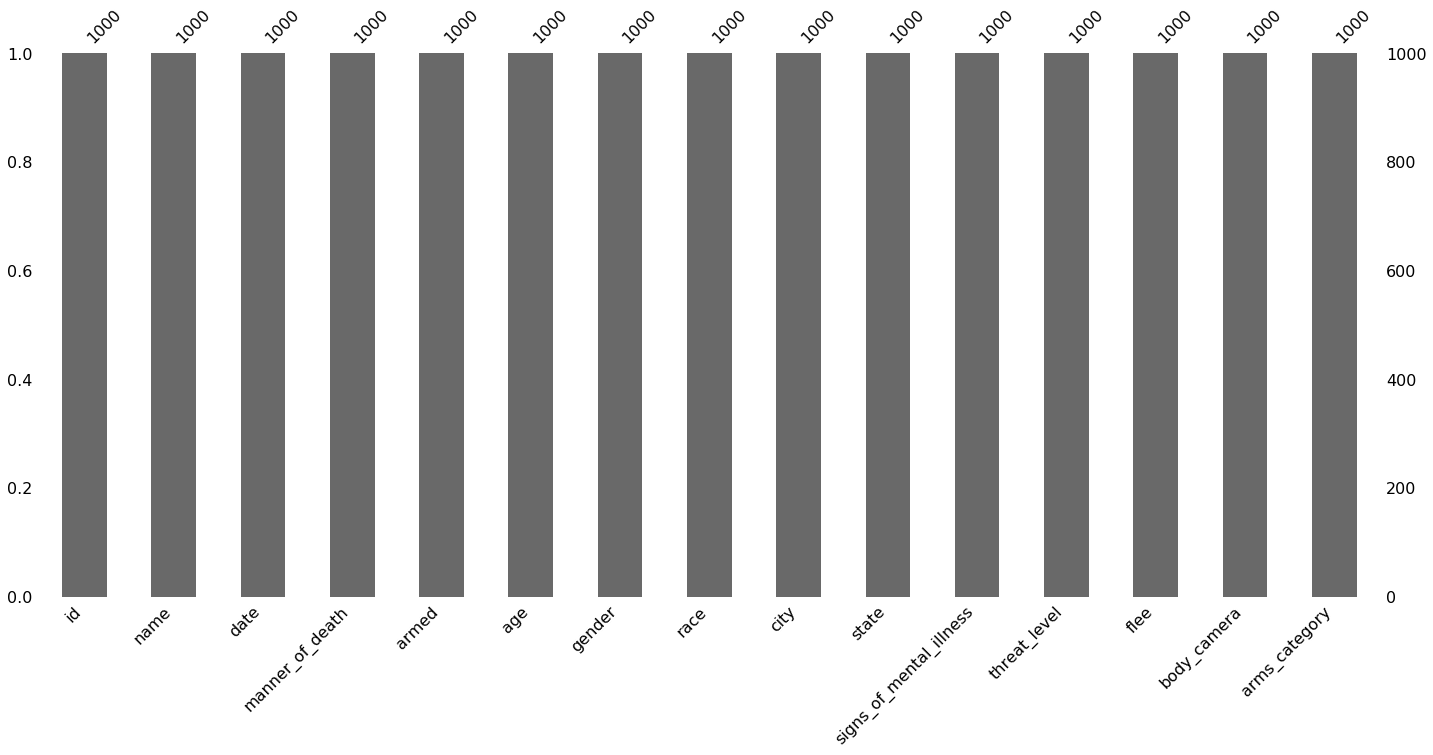

In [82]:
#The missingno module can be used to graphically show the nullity of the data using the bar command
msno.bar(data.sample(1000));

##### Since all the bars reach the peak, it means none of the columns have a null value hence reaffirming the output from the preceeding line of code. If there were null or missing values, the height of the various bars representing the columns will not reach the peak

## Checking if there are any duplicates in the dataset

In [83]:
# we know that column 'id' is unique, but what if we drop it?
data_dedupped = data.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
# the above code helps drops the id column which is a unique identification for all the rows so that any duplicate row will be dropped
print(data.shape)
print(data_dedupped.shape)

(4895, 15)
(4895, 14)


##### The output of the above code shows that none of the rows are a duplicate. It shows that each one is distinct from the other one. If there were to be duplicates, then the first entry of the second tuple will be less than the first entry of the first tuple but since they are the same, it means that there are no duplicates in the rows of the dataset

In [84]:
#This is to show the first 5 rows of the new table produced without the id 
data_dedupped.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [85]:
#This is to show the last 5 rows of the new table produced without the id 
data_dedupped.tail()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


## Checking For Outliers In The Data

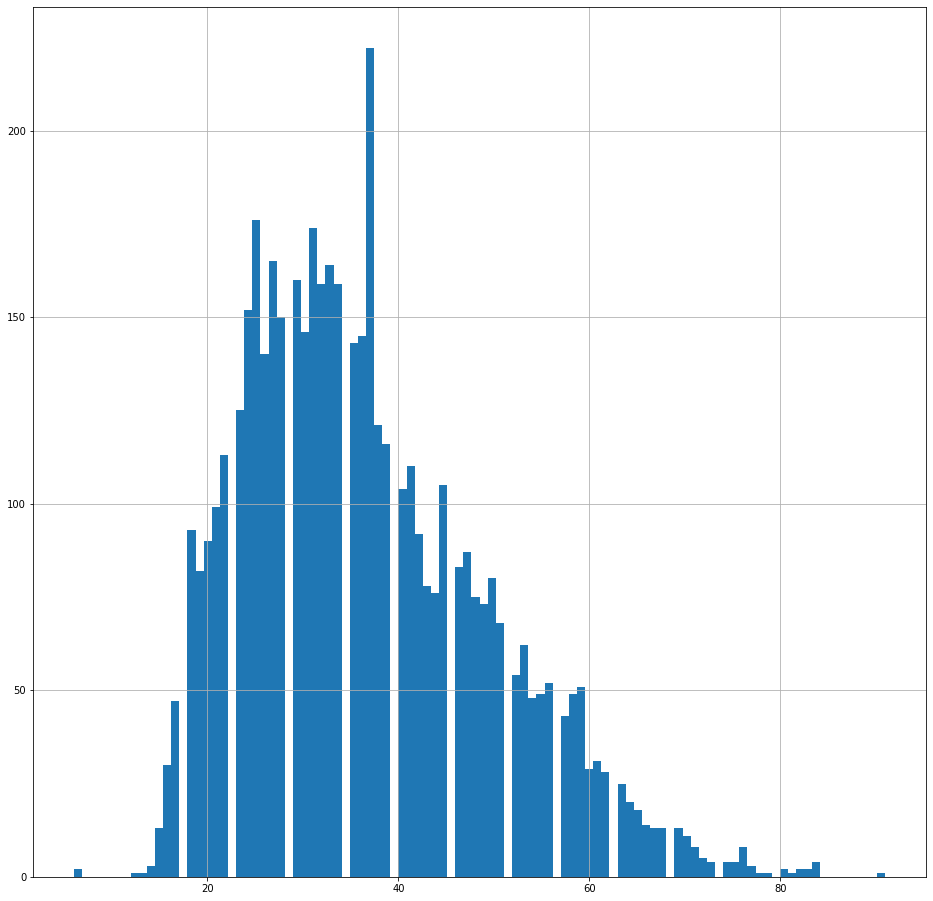

In [93]:
# histogram of age to show how the values are arranged
data['age'].hist(bins=100, figsize=(16,16));

In [96]:
#This is to describe the age column by showing the various percentiles, max, min values etc
data['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

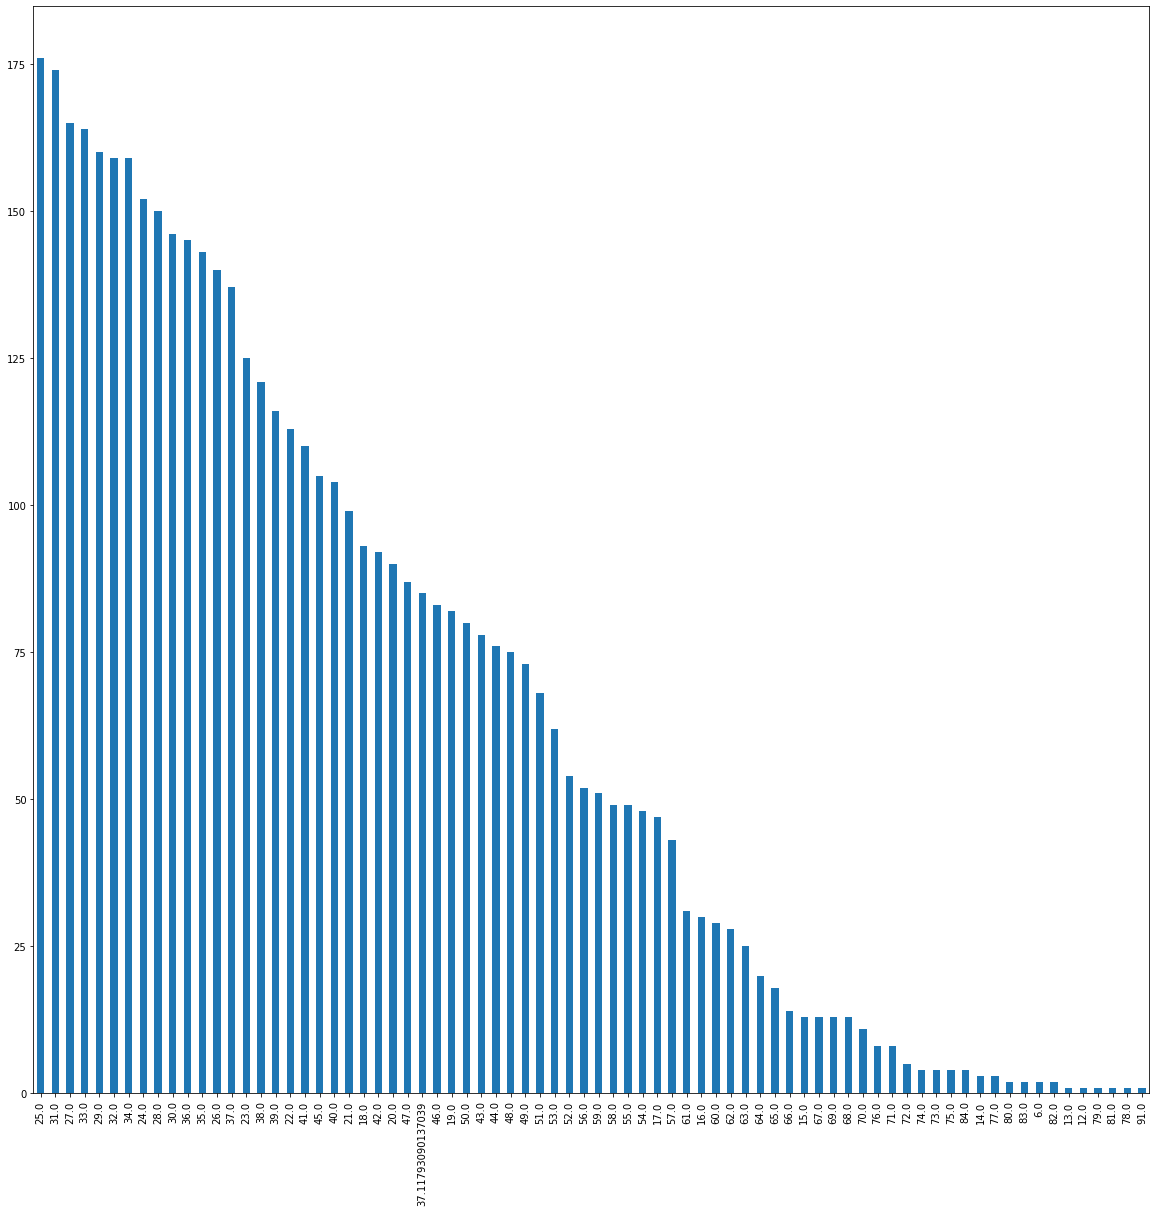

In [106]:
data['age'].value_counts().plot.bar(figsize=(20,20));

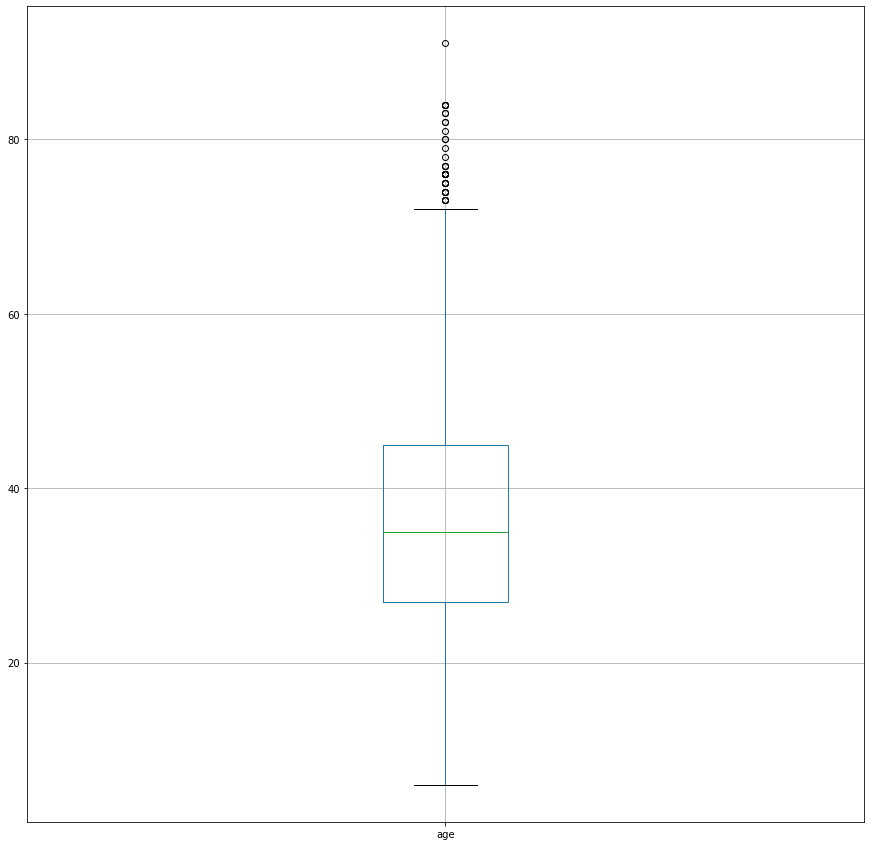

In [98]:
#To make a boxplot to show how the data is distributed
data.boxplot(column=['age'], figsize=(15, 15));

## Checking For Less Important Data In The DataSet

In [103]:
#This code is used to calculate the columns with more than 90% of the rows having the same values
#This is done to give an overview of the columns that should be given higher priority in the analysis of the data
num_rows = len(data.index)
low_information_cols = [] 

for col in data.columns:
    counts = data[col].value_counts(dropna=False)
    top_pct = (counts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(counts)
        print()

manner_of_death: 94.93361%
shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

gender: 95.46476%
M    4673
F     222
Name: gender, dtype: int64



## Checking For Inconsistent Data In The DataSet